In [1]:
import matplotlib.pyplot as plt
from postprocessing import segment_roots, calculate_root_lengths, detect_landmarks
import cv2

2024-05-16 12:55:29.757629: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 12:55:30.530825: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


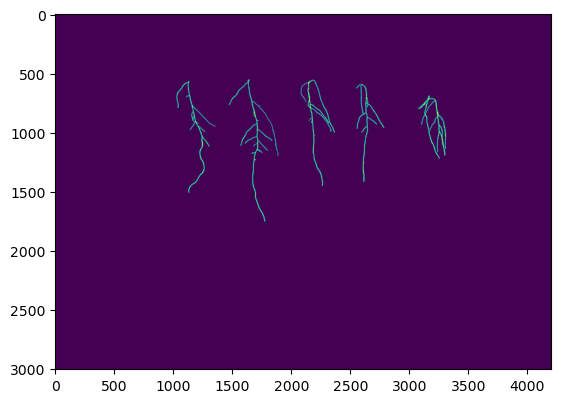

In [2]:
im = cv2.imread('../data/test/masks/033_43-14-ROOT1-2023-08-08_pvdCherry_OD001_Col0_05-Fish Eye Corrected_root_mask.tif', cv2.IMREAD_GRAYSCALE)
im_occ = cv2.imread('../data/test/masks/033_43-14-ROOT1-2023-08-08_pvdCherry_OD001_Col0_05-Fish Eye Corrected_occluded_root_mask.tif', cv2.IMREAD_GRAYSCALE)

root_im = cv2.bitwise_or(im, im_occ)
plt.imshow(root_im)

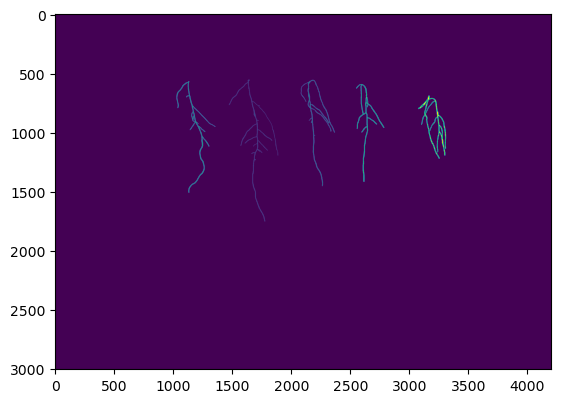

In [3]:
segment_roots_im = segment_roots(root_im, 5)
plt.imshow(segment_roots_im)

In [4]:
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph
from skimage.morphology import skeletonize

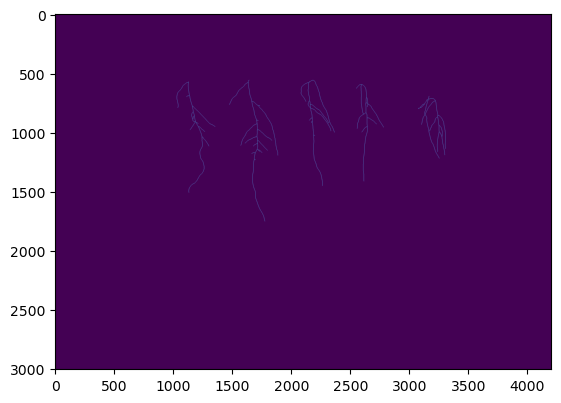

In [5]:
root_skeleton = skeletonize(segment_roots_im)
plt.imshow(root_skeleton)

In [6]:
summary = summarize(Skeleton(root_skeleton))
summary

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,0,1,102,26.071068,1,1.0,0.0,559,1646,579,1637,559,1646,579,1637,21.931712
1,1,52,68,3.414214,1,1.0,0.0,570,2156,573,2157,570,2156,573,2157,3.162278
2,2,60,89,6.828427,1,1.0,0.0,572,1132,578,1130,572,1132,578,1130,6.324555
3,1,68,6519,555.114790,1,1.0,0.0,573,2157,1002,2369,573,2157,1002,2369,478.523772
4,1,68,131,11.899495,2,1.0,0.0,573,2157,581,2149,573,2157,581,2149,11.313708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,8411,8556,20.142136,1,1.0,0.0,1151,1724,1164,1737,1151,1724,1164,1737,18.384776
105,0,8667,8721,33.313708,1,1.0,0.0,1175,1695,1181,1665,1175,1695,1181,1665,30.594117
106,0,8667,8995,58.899495,2,1.0,0.0,1175,1695,1231,1688,1175,1695,1231,1688,56.435804
107,0,8995,9017,11.242641,1,1.0,0.0,1231,1688,1234,1698,1231,1688,1234,1698,10.440307


In [7]:
graph = calculate_root_lengths(summary)

2024-05-16 12:55:34,989 - utils - INFO - Calculating root lengths for all skeletons.
2024-05-16 12:55:34,989 - utils - INFO - Calculating root lengths for all skeletons.
2024-05-16 12:55:34,990 - utils - INFO - Processing skeleton ID: 0
2024-05-16 12:55:34,990 - utils - INFO - Processing skeleton ID: 0
2024-05-16 12:55:34,991 - utils - INFO - Calculating root lengths for a subgraph.
2024-05-16 12:55:34,991 - utils - INFO - Calculating root lengths for a subgraph.
2024-05-16 12:55:34,992 - utils - INFO - Processing skeleton ID: 1
2024-05-16 12:55:34,992 - utils - INFO - Processing skeleton ID: 1
2024-05-16 12:55:34,993 - utils - INFO - Calculating root lengths for a subgraph.
2024-05-16 12:55:34,993 - utils - INFO - Calculating root lengths for a subgraph.
2024-05-16 12:55:34,993 - utils - INFO - Processing skeleton ID: 2
2024-05-16 12:55:34,993 - utils - INFO - Processing skeleton ID: 2
2024-05-16 12:55:34,994 - utils - INFO - Calculating root lengths for a subgraph.
2024-05-16 12:55:3

In [8]:
graph

{0: {'main_root_length': 1299.9970414071709,
  'lateral_root_length': 13804.550283323668,
  'main_root_src': 1,
  'main_root_dest': 10233},
 1: {'main_root_length': 952.2031021678306,
  'lateral_root_length': 5119.872508663643,
  'main_root_src': 52,
  'main_root_dest': 9876},
 2: {'main_root_length': 1080.9209229614225,
  'lateral_root_length': 6248.9233739399715,
  'main_root_src': 60,
  'main_root_dest': 9989},
 3: {'main_root_length': 872.249783362056,
  'lateral_root_length': 3956.265294201205,
  'main_root_src': 286,
  'main_root_dest': 9749},
 4: {'main_root_length': 598.5168106668154,
  'lateral_root_length': 5265.352739403996,
  'main_root_src': 1236,
  'main_root_dest': 8961}}

2024-05-16 12:55:35,007 - utils - INFO - Marking landmarks on the image.
2024-05-16 12:55:35,007 - utils - INFO - Marking landmarks on the image.


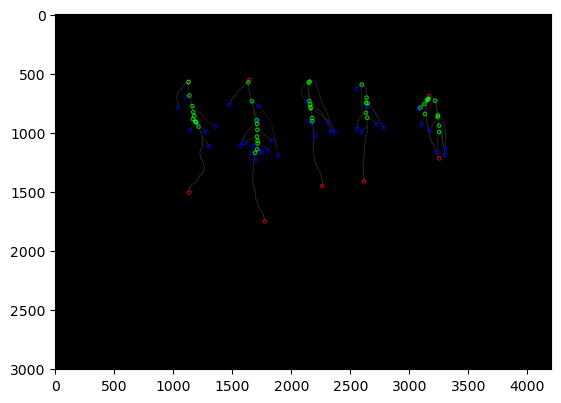

In [9]:
marked_im = detect_landmarks(root_im, summary, [1, 52, 60, 286, 1236], [10233, 9876, 9989, 9749, 8961])
plt.imshow(marked_im)

In [10]:
cv2.imwrite('./test.png', marked_im)

True